In [1]:
# Testing the IoU Optimized model

In [2]:
import nibabel as nib 
import os
from sklearn.model_selection import train_test_split
from Generators import DataGenerator3D
import keras

2023-04-30 14:14:39.742778: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_data_path = "../data"

feaure_directories = [file.path for file in os.scandir(train_data_path) if file.is_dir()]
train_directories, test_directories = train_test_split(feaure_directories, test_size=.3, random_state=0)

def getids(paths):
  x=list()
  for i in range(len(paths)):
    x.append(paths[i][paths[i].rfind('/')+1:])
  return x

In [4]:
image_size = 128
classes = {0 : 'NOT tumor',1 : 'NECROTIC/CORE',2 : 'EDEMA', 3 : 'ENHANCING'}
slices = 128 
start = 22
image_size=128


def iou(y_true, y_pred):
    y_true = tensorflow.keras.backend.flatten(y_true)
    y_pred = tensorflow.keras.backend.flatten(y_pred)
    y_true_f = tensorflow.cast(y_true, tensorflow.float32)
    y_pred_f = tensorflow.cast(y_pred, tensorflow.float32)
    intersection = tensorflow.keras.backend.sum(y_true_f * y_pred_f)
    union = tensorflow.keras.backend.sum(y_true_f) + tensorflow.keras.backend.sum(y_pred_f) - intersection
    return (intersection + 1e-7) / (union + 1e-7)

def iou_loss(y_true, y_pred):
    return -1*iou(y_true, y_pred)

In [11]:
testing_ids = [(getids(test_directories))[0]]
data_generator = DataGenerator3D(testing_ids,slices,start,image_size,train_data_path)

In [23]:
network = keras.models.load_model('../models/model_vnet_2mod.h5', custom_objects={"iou_loss": iou_loss})

In [24]:
preds = network.predict(data_generator)

['BraTS2021_00802']


2023-04-30 14:22:04.833403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


['BraTS2021_00802']
1/1 [==============================] - 3s 3s/step


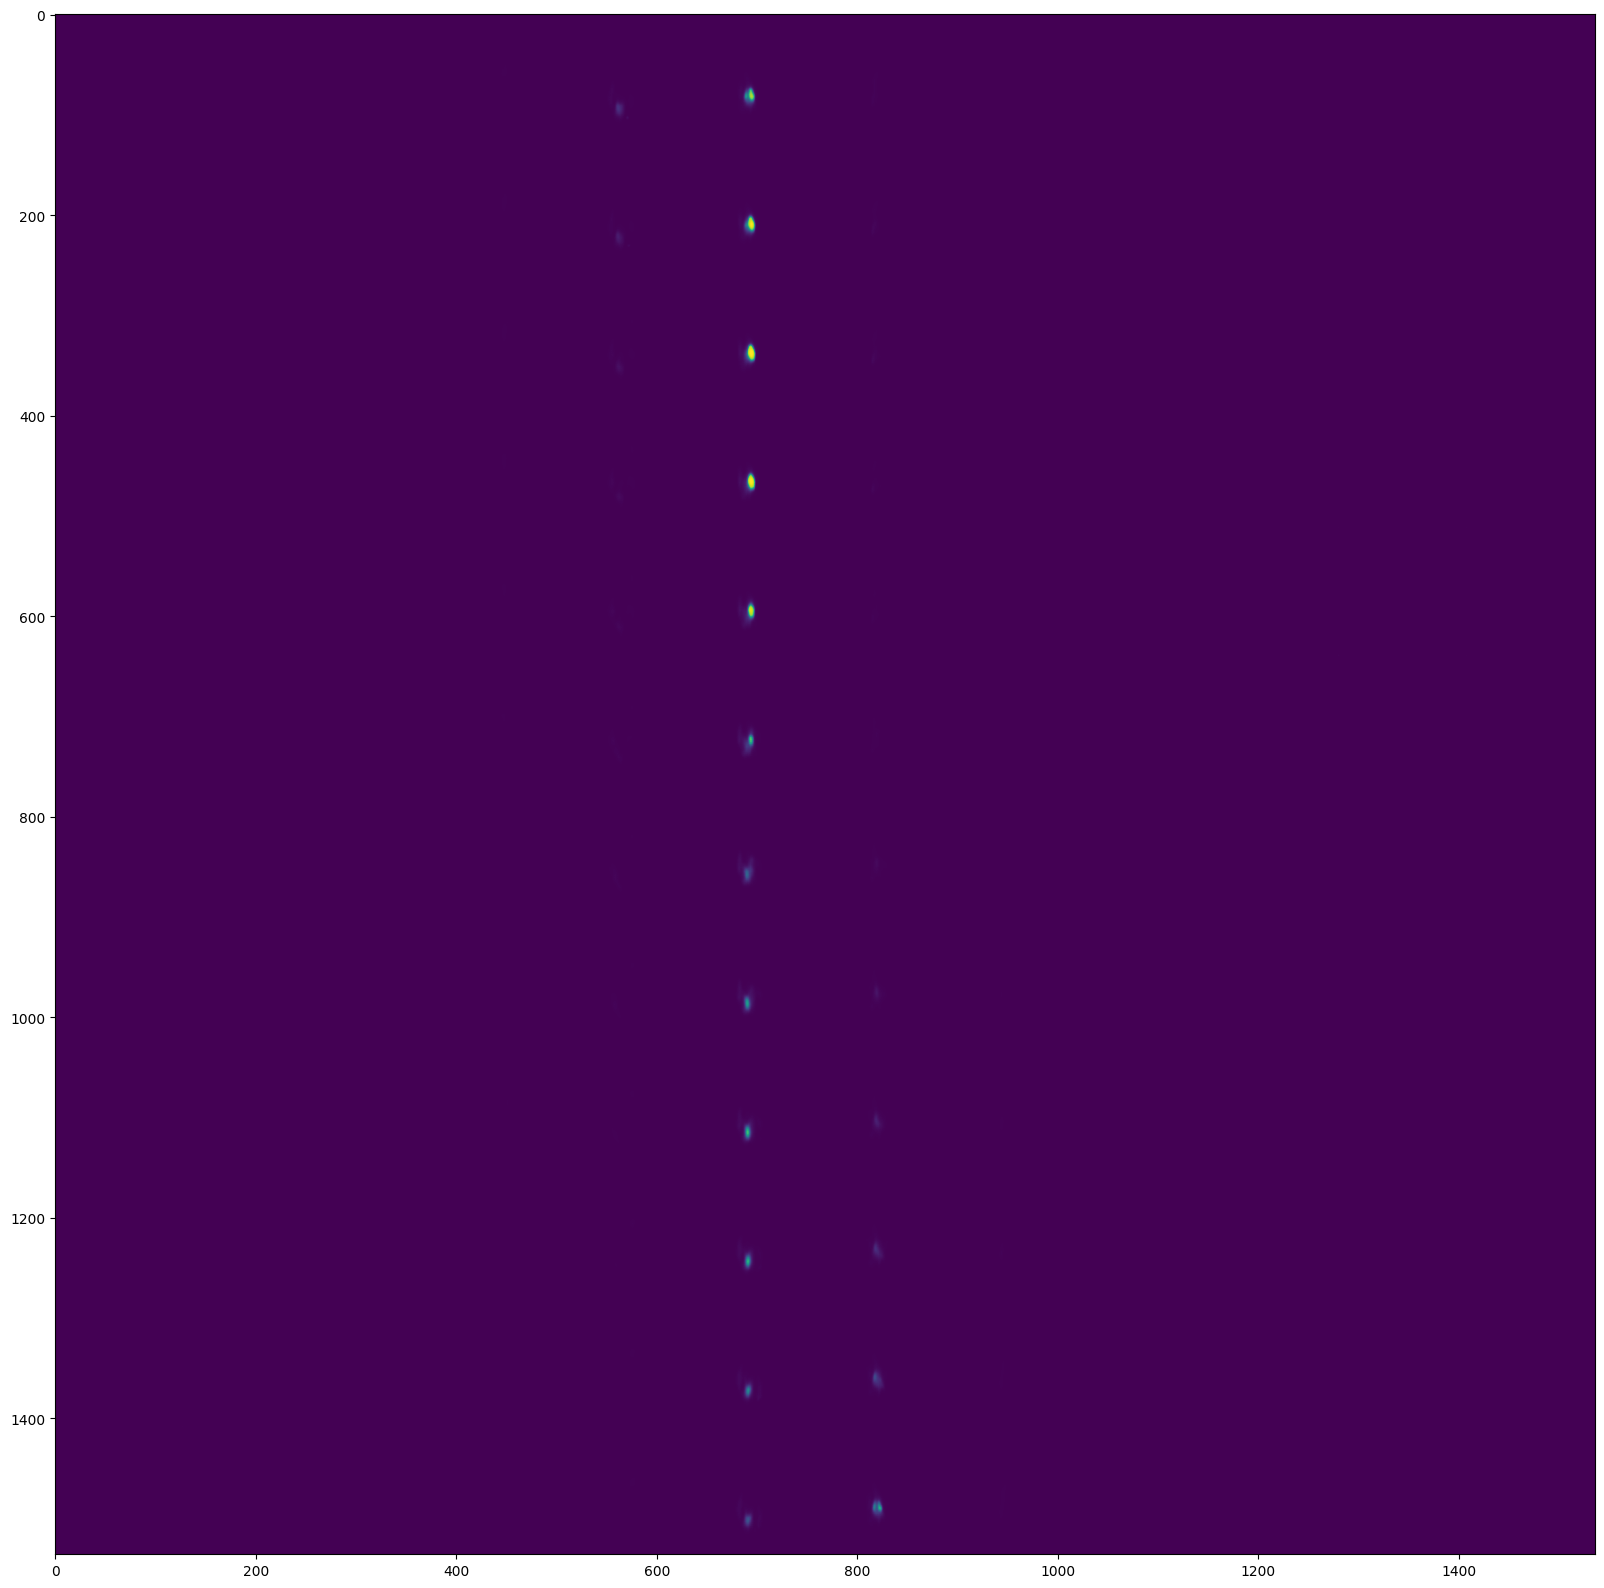

In [55]:
from skimage.util import montage 
from skimage.transform import rotate
import matplotlib.pyplot as plt
import numpy as np

def imshow3D(img, save=False, path=None):
    if save and path==None:
        print("Error. Cannot save without a valid path.")
        return
    fig,ax = plt.subplots(1, 1, figsize = (20,20))
    ax.imshow(rotate(montage(np.swapaxes(img,0,2)), 90, resize=True))

def getBinaryPrediction(masks):
    masks = masks[0,:,:,:,:]
    return ( (-1*masks)[:,:,:,0] )

binmask = getBinaryPrediction(preds)
imshow3D(binmask)
ground_truth = nib.load(test_directories[0] + "/BraTS2021_00802_seg.nii.gz")


In [59]:
ground_truth.get_fdata().min()

0.0